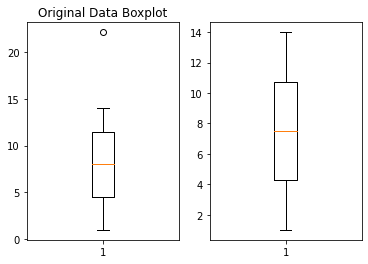

In [10]:
# 이상치 처리에 대해서 알아보아요!
import numpy as np
import matplotlib.pyplot as plt

data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 22.1])

figure = plt.figure()

ax1 = figure.add_subplot(1,2,1)
ax2 = figure.add_subplot(1,2,2)

ax1.set_title('Original Data Boxplot')
ax1.boxplot(data)

# numpy로 사분위 값을 구해서 Turkey Fence 방식으로 이상치를 판단해 보아요!
first = np.percentile(data, 25)  # 1사분위 값을 구해요!
third = np.percentile(data, 75)  # 3사분위 값을 구해요!
IQR_value = third - first

upper_fence = third + (IQR_value * 1.5)
lower_fence = first - (IQR_value * 1.5)

# boolean indexing을 이용해서 이상치를 추출해보아요!
# print(data[(data > upper_fence) | (data < lower_fence)])   # array([22.1])
# boolean indexing을 이용해서 이상치를 제거하고 나머지 데이터를 추출해요!
result = data[(data <= upper_fence) & (data >= lower_fence)]
ax2.boxplot(result)
plt.show()

In [13]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 22.1])

mean = data.mean() # 8.473333333333333
std = data.std()   # 5.331974826980671

zscore_data = (data - mean) / std

print(zscore_data)

[-1.40160702 -1.21405925 -1.02651147 -0.8389637  -0.65141593 -0.46386816
 -0.27632038 -0.08877261  0.09877516  0.28632293  0.4738707   0.66141848
  0.84896625  1.03651402  2.55565098]


In [26]:
# scipy는 sklearn과 유사한 통계전용 모듈

from scipy import stats

data = np.array([-10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 22.1])

zscore_threshold = 2.0 # 일반적인 기준.

outlier = data[np.abs(stats.zscore(data)) > zscore_threshold]
print(outlier)

data[np.isin(data, outlier, invert=True)]

[-10.   22.1]


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14.])

In [34]:
### 온도에 따른 오존량 예측 ==> Python 구현
### 결측치 처리와 이상치 처리도 같이 진행!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

################################################
# 다변수 함수에 대한 수치미분을 수행하는 함수
def numerical_derivative(f,x):    # x : ndarray [1.0  2.0]
    
    delta_x = 1e-4
    derivative_x = np.zeros_like(x)   # derivative_x : [0.0  0.0]
    
    # iterator를 이용해서 입력변수 x에 대한 편미분을 수행!
    it = np.nditer(x, flags=['multi_index'])
    
    while not it.finished:
        
        idx = it.multi_index 
        tmp = x[idx]              # tmp : 1.0
        
        x[idx] = tmp + delta_x    # x : ndarray [1.0001  2.0]
        fx_plus_delta = f(x)
        
        x[idx] = tmp - delta_x    # x : ndarray [0.9999  2.0]  
        fx_minus_delta = f(x)
        
        derivative_x[idx] = (fx_plus_delta - fx_minus_delta) / (2 * delta_x)
        
        x[idx] = tmp              #  x : ndarray [1.0  2.0]  
        it.iternext()
        
    return derivative_x
################################################

# Raw Data Set Loading
df = pd.read_csv('./data/ozone.csv')
training_data = df[['Ozone', 'Temp']]

# 데이터에 결치값이 존재해요!
# 여기서는 결치값을 삭제할꺼예요!
training_data.dropna(how='any',
                     inplace=True)   # how='any' : 결치가 존재하는 행을 삭제

# 데이터에 이상치가 있는지 확인하고 제거
zscore_threshold = 2.0
outlier = training_data['Ozone'][(np.abs(stats.zscore(training_data['Ozone'])) > zscore_threshold)]
training_data = training_data.loc[np.isin(training_data['Ozone'],outlier, invert=True)]


# Training Data Set
x_data = training_data['Temp'].values.reshape(-1,1)
t_data = training_data['Ozone'].values.reshape(-1,1)

# Weight, bias
W = np.random.rand(1,1)
b = np.random.rand(1)

# loss function
def loss_func(input_data):
    W = input_data[0].reshape(1,1)
    b = input_data[1]
    
    y = np.dot(x_data,W) + b
    return np.mean(np.power(t_data-y,2))

# predict
def predict(x):
    y = np.dot(x,W) + b
    return y

# learning_rate
learning_rate = 1e-4

# 반복 학습
for step in range(300000):
    
    input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)  # [W b]
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)

    W = W - derivative_result[0].reshape(1,1)
    b = b - derivative_result[1]
    
    if step % 30000 == 0:
        input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)
        print('W : {}, b:{}, loss:{}'.format(W, b, loss_func(input_param)))


C:\Users\campusseven02\AppData\Local\Temp\ipykernel_2556\1239042433.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data.dropna(how='any',


W : [[0.4736043]], b:[0.13704916], loss:495.948505430511
W : [[0.63278757]], b:[-10.45764245], loss:454.9403453970632
W : [[0.75641423]], b:[-20.1620112], loss:423.5235363631465
W : [[0.86964865]], b:[-29.05061645], loss:397.1666120802635
W : [[0.97336441]], b:[-37.19203248], loss:375.05464466086414
W : [[1.06836168]], b:[-44.6490691], loss:356.5039557467191
W : [[1.15537334]], b:[-51.47925626], loss:340.9409778962145
W : [[1.23507067]], b:[-57.73528785], loss:327.8845204947988
W : [[1.30806853]], b:[-63.46542823], loss:316.9308918568402
W : [[1.37493008]], b:[-68.71388458], loss:307.7414175109792


In [35]:
# 학습종료 후 예측 (Temp : 62)
predict_data = predict(np.array([[62]]))
print('온도가 62일때 오존량 : {}'.format(predict_data))  # [[16.88715564]]
                                                         # [[15.52149525]] 

온도가 62일때 오존량 : [[15.52149525]]


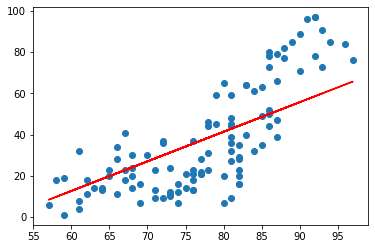

In [36]:
# 그래프로 표현해 보아요!
plt.scatter(x_data.ravel(), t_data.ravel())
plt.plot(x_data.ravel(), x_data.ravel()*W.ravel() + b, color='r')
plt.show()

sklearn으로 구한 온도가 62도 일때의 오존량 : [[4.51299041]]


C:\Users\campusseven02\AppData\Local\Temp\ipykernel_2556\2906083854.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data.dropna(how='any',


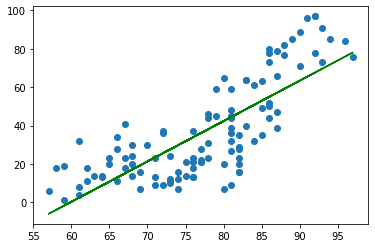

In [37]:
# 같은 데이터로 sklearn을 이용해서 구현해 보아요!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

df = pd.read_csv('./data/ozone.csv')
training_data = df[['Ozone', 'Temp']]
training_data.dropna(how='any',
                     inplace=True)   # how='any' : 결치가 존재하는 행을 삭제

# 데이터에 이상치가 있는지 확인하고 제거
zscore_threshold = 2.0
outlier = training_data['Ozone'][(np.abs(stats.zscore(training_data['Ozone'])) > zscore_threshold)]
training_data = training_data.loc[np.isin(training_data['Ozone'],outlier, invert=True)]


# Training Data Set
x_data = training_data['Temp'].values.reshape(-1,1)
t_data = training_data['Ozone'].values.reshape(-1,1)

# model 생성
model = linear_model.LinearRegression()

# model 학습
model.fit(x_data, t_data)

# 예측
result = model.predict(np.array([[62]]))
print('sklearn으로 구한 온도가 62도 일때의 오존량 : {}'.format(result))  
# [[3.58411393]]   =>  [[4.51299041]]

# 그래프 표현
plt.scatter(x_data.ravel(), t_data.ravel())
plt.plot(x_data.ravel(), 
         x_data.ravel()*model.coef_.ravel() + model.intercept_, color='g')
plt.show()

In [41]:
### 일단 Min-Max Scaling 작업을 어떻게 하면 되는지 알아보아요!!!
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')
df = titanic[['age', 'fare']]

display(df.head())

def min_max(s):
    return (s - s.min()) / (s.max() - s.min())

result = df.apply(min_max, axis=0)

display(result.head())

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


,age,fare
0,0.271174,0.014151
1,0.472229,0.139136
2,0.321438,0.015469
3,0.434531,0.103644
4,0.434531,0.015713


C:\Users\campusseven02\AppData\Local\Temp\ipykernel_2556\884140217.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data.dropna(how='any',
C:\Users\campusseven02\AppData\Local\Temp\ipykernel_2556\884140217.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['Temp'] = scaled_Temp
C:\Users\campusseven02\AppData\Local\Temp\ipykernel_2556\884140217.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

W : [[0.79435927]], b:[0.6251788], loss:0.45941250060030187
W : [[0.60466769]], b:[0.07193309], loss:0.03234461367283534
W : [[0.66726547]], b:[0.03831357], loss:0.030651992027243967
W : [[0.71552337]], b:[0.01264166], loss:0.029650336075183577
W : [[0.75264794]], b:[-0.00710748], loss:0.029057542881231687
W : [[0.78120764]], b:[-0.02230039], loss:0.02870672005620746
W : [[0.80317844]], b:[-0.03398819], loss:0.028499098484614387
W : [[0.82008045]], b:[-0.04297955], loss:0.028376225302153092
W : [[0.83308307]], b:[-0.04989655], loss:0.028303507333339372
W : [[0.8430859]], b:[-0.05521775], loss:0.02826047188099348
[[52.68909775]]


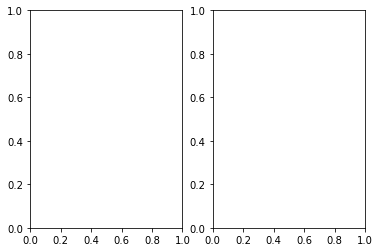

In [47]:
### 정규화 작업을 포함해서 모델학습을 진행해 보아요!
### 그런데 이번에는 이 정규화 작업을 Min-Max Scaling으로 진행할꺼구요!
### sklearn의 기능을 이용해서 정규화를 진행해 보아요!
# 같은 데이터로 sklearn을 이용해서 구현해 보아요!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model  # LinearRegression 모델
from scipy import stats    # 이상치 처리
from sklearn.preprocessing import MinMaxScaler  # 정규화 처리

####### 그래프 
figure = plt.figure()

python_ax = figure.add_subplot(1,2,1)
sklearn_ax = figure.add_subplot(1,2,2)
#######

df = pd.read_csv('./data/ozone.csv')
training_data = df[['Ozone', 'Temp']]
training_data.dropna(how='any',
                     inplace=True)   # how='any' : 결치가 존재하는 행을 삭제

# 데이터에 이상치가 있는지 확인하고 제거
zscore_threshold = 2.0
outlier = training_data['Ozone'][(np.abs(stats.zscore(training_data['Ozone'])) > zscore_threshold)]
training_data = training_data.loc[np.isin(training_data['Ozone'],outlier, invert=True)]

# 정규화 처리를 해야 해요!
# display(training_data.head())
# 일단 scaler를 만들어요!
scaler_x = MinMaxScaler()   # 온도 처리를 위한 scaler(독립변수들을 위한 scaler)
scaler_t = MinMaxScaler()   # 오존량 처리를 위한 scaler(종속변수를 위한 scaler)

scaler_x.fit(training_data['Temp'].values.reshape(-1,1))
scaler_t.fit(training_data['Ozone'].values.reshape(-1,1))

scaled_Temp = scaler_x.transform(training_data['Temp'].values.reshape(-1,1))
scaled_Ozone = scaler_t.transform(training_data['Ozone'].values.reshape(-1,1))

training_data['Temp'] = scaled_Temp
training_data['Ozone'] = scaled_Ozone

#####################################

# Training Data Set
x_data = training_data['Temp'].values.reshape(-1,1)
t_data = training_data['Ozone'].values.reshape(-1,1)

# Weight, bias
W = np.random.rand(1,1)
b = np.random.rand(1)

# loss function
def loss_func(input_data):
    W = input_data[0].reshape(1,1)
    b = input_data[1]
    
    y = np.dot(x_data,W) + b
    return np.mean(np.power(t_data-y,2))

# predict
def predict(x):
    y = np.dot(x,W) + b
    return y

# learning_rate
learning_rate = 1e-4

# 반복 학습
for step in range(300000):
    
    input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)  # [W b]
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)

    W = W - derivative_result[0].reshape(1,1)
    b = b - derivative_result[1]
    
    if step % 30000 == 0:
        input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)
        print('W : {}, b:{}, loss:{}'.format(W, b, loss_func(input_param)))
       

In [50]:
# predict
# 아래처럼하면 안되죠!!!
# result = predict([[62]])   # [[16.88715564]]   # [[52.68909775]]

predict_data = np.array([[62]])
scaled_predict_data = scaler_x.transform(predict_data)
python_result = predict(scaled_predict_data)

python_result = scaler_t.inverse_transform(python_result)

print(python_result)     # [[5.51549383]]

[[5.51549383]]


In [51]:
# sklearn 구현

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

df = pd.read_csv('./data/ozone.csv')
training_data = df[['Ozone', 'Temp']]
training_data.dropna(how='any',
                     inplace=True)   # how='any' : 결치가 존재하는 행을 삭제

# 데이터에 이상치가 있는지 확인하고 제거
zscore_threshold = 2.0
outlier = training_data['Ozone'][(np.abs(stats.zscore(training_data['Ozone'])) > zscore_threshold)]
training_data = training_data.loc[np.isin(training_data['Ozone'],outlier, invert=True)]

# 정규화는 안해도 되요! sklearn이 알아서 해줘요!

# Training Data Set
x_data = training_data['Temp'].values.reshape(-1,1)
t_data = training_data['Ozone'].values.reshape(-1,1)

# model 생성
model = linear_model.LinearRegression()

# model 학습
model.fit(x_data, t_data)

# 예측
result = model.predict(np.array([[62]]))
print('sklearn으로 구한 온도가 62도 일때의 오존량 : {}'.format(result))  
# [[4.51299041]]

sklearn으로 구한 온도가 62도 일때의 오존량 : [[4.51299041]]


C:\Users\campusseven02\AppData\Local\Temp\ipykernel_2556\2445977219.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data.dropna(how='any',


In [52]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [55]:
# 새마음 새뜻으로 다시 해 보아요!
import numpy as np
import pandas as pd


################################################
# 다변수 함수에 대한 수치미분을 수행하는 함수
def numerical_derivative(f,x):    # x : ndarray [1.0  2.0]
    
    delta_x = 1e-4
    derivative_x = np.zeros_like(x)   # derivative_x : [0.0  0.0]
    
    # iterator를 이용해서 입력변수 x에 대한 편미분을 수행!
    it = np.nditer(x, flags=['multi_index'])
    
    while not it.finished:
        
        idx = it.multi_index 
        tmp = x[idx]              # tmp : 1.0
        
        x[idx] = tmp + delta_x    # x : ndarray [1.0001  2.0]
        fx_plus_delta = f(x)
        
        x[idx] = tmp - delta_x    # x : ndarray [0.9999  2.0]  
        fx_minus_delta = f(x)
        
        derivative_x[idx] = (fx_plus_delta - fx_minus_delta) / (2 * delta_x)
        
        x[idx] = tmp              #  x : ndarray [1.0  2.0]  
        it.iternext()
        
    return derivative_x
################################################

# Raw Data Loading
df = pd.read_csv('./data/student_exam_score.csv')
# display(df)

# 결측치, 이상치가 존재하지 않구요!
# 각 변수의 scale이 비슷하기 때문에 정규화도 굳이 필요하지 않아요!

# Training Data Set
x_data = df.drop('exam', axis=1, inplace=False)
t_data = df.iloc[:,-1].values.reshape(-1,1)

# Weight, bias
W = np.random.rand(3,1)
b = np.random.rand(1)

# loss function
def loss_func(input_data):    # [w1  w2  w3  b]
    
    input_w = input_data[:-1].reshape(-1,1)
    input_b = input_data[-1:]
    
    y = np.dot(x_data,input_w) + input_b
    
    return np.mean(np.power(t_data-y,2))   # MSE(평균제곱오차)

# predict
def predict(x):
    y = np.dot(x,W) + b
    return y

# learning_rate
learning_rate = 1e-5

# 반복 학습
for step in range(300000):
    
    input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)  # [w1 w2 w3 b]
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)

    W = W - derivative_result[:-1].reshape(-1,1)
    b = b - derivative_result[-1]
    
    if step % 30000 == 0:
        input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)
        print('W : {}, b:{}, loss:{}'.format(W, b, loss_func(input_param)))
       

W : [[0.7946431 ]
 [0.32234037]
 [0.34377889]], b:[0.62637326], loss:2081.922334942366
W : [[0.35632701]
 [0.52855104]
 [1.12155572]], b:[0.57702282], loss:6.203278807696709
W : [[0.35599025]
 [0.52888733]
 [1.12223482]], b:[0.52051364], loss:6.192630563617122
W : [[0.35598947]
 [0.52904422]
 [1.12275491]], b:[0.46465252], loss:6.182227917403403
W : [[0.35598888]
 [0.5291992 ]
 [1.12326893]], b:[0.40943392], loss:6.172063198798278
W : [[0.3559883 ]
 [0.52935241]
 [1.12377703]], b:[0.35485044], loss:6.162130965960107
W : [[0.35598772]
 [0.52950385]
 [1.1242793 ]], b:[0.30089479], loss:6.152425901512768
W : [[0.35598715]
 [0.52965354]
 [1.12477578]], b:[0.24755974], loss:6.142942809698334
W : [[0.35598659]
 [0.52980152]
 [1.12526656]], b:[0.19483816], loss:6.13367661359537
W : [[0.35598603]
 [0.5299478 ]
 [1.12575169]], b:[0.14272298], loss:6.124622352400894


In [56]:
# predict
result = predict(np.array([[89, 100, 95]]))
print(result)   # [[191.77512112]]

[[191.77512112]]


In [57]:
# sklearn 구현
from sklearn import linear_model

model = linear_model.LinearRegression()

model.fit(x_data, t_data)

result_sklearn = model.predict(np.array([[89, 100, 95]]))
print(result_sklearn)   # [[192.50147537]]

[[192.50147537]]


C:\Users\campusseven02\anaconda3\envs\machine\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
